<a href="https://colab.research.google.com/github/tbirch4/chi-map-maker/blob/main/chi_map_maker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Replace "Lou Malnati's" with your desired search string, then click Runtime > Run all.

query = "Lou Malnati's"

In [ ]:
# Import modules

%%capture

import requests
import pandas as pd
!pip install geopandas
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import shape
from google.colab import files

In [ ]:
# Get coordinates for all locations in Chicago using the OpenStreetsMap API ("Nominatim").

nominatim_url = "https://nominatim.openstreetmap.org/search?"
nominatim_payload = {
    "q" : query + ", Chicago IL", 
    "addressdetails" : 1, 
    "format" : "json", 
    "limit" : 50}
nominatim_response = requests.get(nominatim_url, params=nominatim_payload)

if nominatim_response.status_code != 200:
    print("Request error: " + str(nominatim_response.status_code))

elif len(nominatim_response.json()) == 0:
    print("Query returned no results. Please change query string and try again.") 
    
else:
    points_df = pd.DataFrame(nominatim_response.json())
    points_df = points_df[points_df["address"].apply(lambda x: x.get('city', x.get('town'))) == 'Chicago']
    points_gdf = gpd.GeoDataFrame(
        points_df, 
        geometry=gpd.points_from_xy(points_df["lon"], points_df["lat"]), 
        crs="EPSG:4326")
    print("Query returned " + str(points_df.index.max() + 1) + " results.\n")
    for i, result in enumerate(points_df["display_name"].sort_values()):
        print(str(i + 1) + "\t" + result[:100] + "...")

In [ ]:
# Get outlines of Chicago community areas from the city data portal.

outlines_url = "https://data.cityofchicago.org/resource/igwz-8jzy.json"
outlines_response = requests.get(outlines_url)

outlines_df = pd.DataFrame(outlines_response.json())
outlines_df["geom"] = outlines_df["the_geom"].apply(lambda x: shape(x))
outlines_gdf = gpd.GeoDataFrame(outlines_df, geometry="geom", crs="EPSG:4326")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

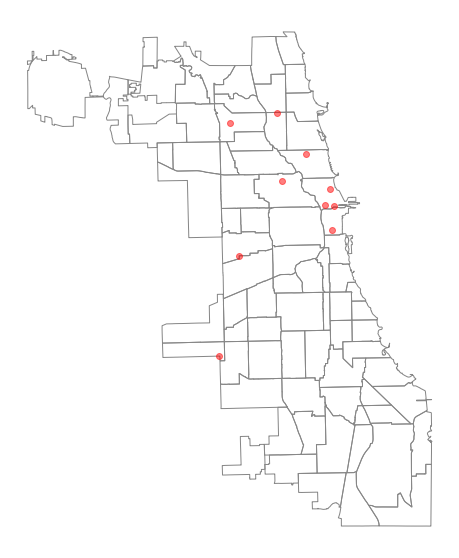

In [ ]:
# Plot locations and community area outlines.

fig, ax = plt.subplots(figsize = (12, 12))

outlines_gdf.plot(ax=ax, facecolor="none", edgecolor="#878787")
points_gdf.plot(ax=ax, color="red", alpha=0.65)

ax.axis("off")

plt.savefig(query + ".png", bbox_inches="tight")
files.download(query + ".png")